In [3]:
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import sys
# Point to the project root (adjust parents[1] to parents[2] if your notebook is deeper)
PROJECT_ROOT = Path.cwd().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

# <-- Imports custom preprocessing functions from 'functions.py' <-- #

# from lib.functions import ()

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# #for preprocessing
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# #models
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB

# <-- Loads YAML configuration to dynamically reference CSV output files. <-- #

config = None  # <-- Initialize config
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")
    
df_fraud_dataset = pd.read_csv(config['input_data']['file1']) 


In [4]:
# load dataset
# df=pd.read_csv (r'../data/raw/synthetic_fraud_dataset.csv')
df_fraud_dataset.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [5]:
df_fraud_dataset.info(), df_fraud_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

(None,
 Transaction_ID                  0
 User_ID                         0
 Transaction_Amount              0
 Transaction_Type                0
 Timestamp                       0
 Account_Balance                 0
 Device_Type                     0
 Location                        0
 Merchant_Category               0
 IP_Address_Flag                 0
 Previous_Fraudulent_Activity    0
 Daily_Transaction_Count         0
 Avg_Transaction_Amount_7d       0
 Failed_Transaction_Count_7d     0
 Card_Type                       0
 Card_Age                        0
 Transaction_Distance            0
 Authentication_Method           0
 Risk_Score                      0
 Is_Weekend                      0
 Fraud_Label                     0
 dtype: int64)

In [6]:
df_fraud_dataset['Fraud_Label'].unique()

array([0, 1])

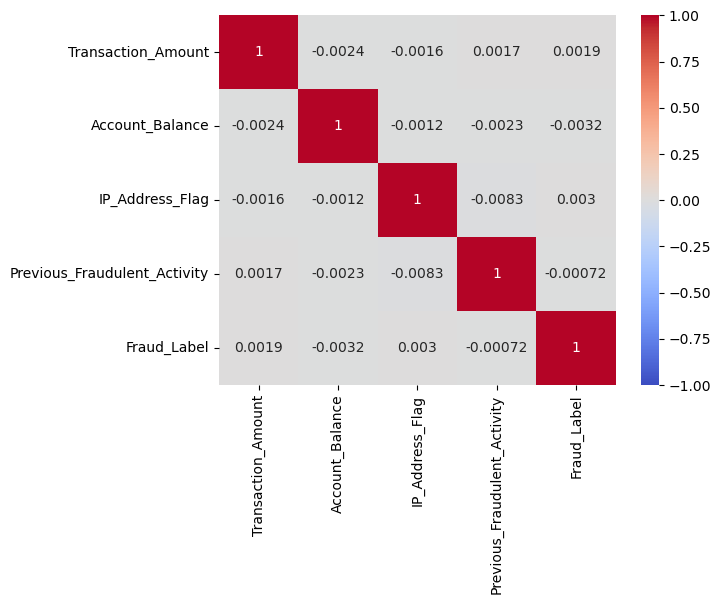

In [7]:
cols = ['Transaction_Amount','Account_Balance','IP_Address_Flag','Previous_Fraudulent_Activity','Fraud_Label']
figsize=(15, 4)
             
corr_v = df_fraud_dataset[cols].corr()
sns.heatmap(corr_v, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
set_title = ("Variation — Correlation matrix")

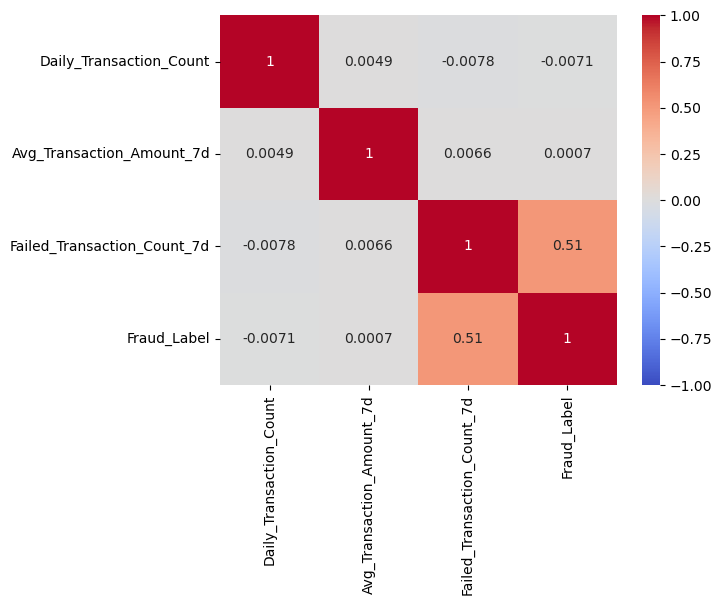

In [8]:
cols = ['Daily_Transaction_Count','Avg_Transaction_Amount_7d','Failed_Transaction_Count_7d','Fraud_Label']
figsize=(15, 4)
             
corr_v = df_fraud_dataset[cols].corr()
sns.heatmap(corr_v, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
set_title = ("Variation — Correlation matrix")

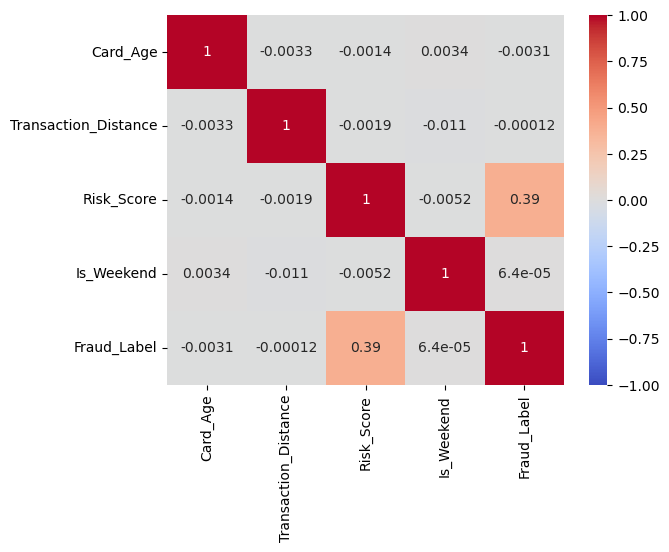

In [9]:
cols = ['Card_Age','Transaction_Distance','Risk_Score','Is_Weekend','Fraud_Label']
figsize=(15, 4)
             
corr_v = df_fraud_dataset[cols].corr()
sns.heatmap(corr_v, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
set_title = ("Variation — Correlation matrix")

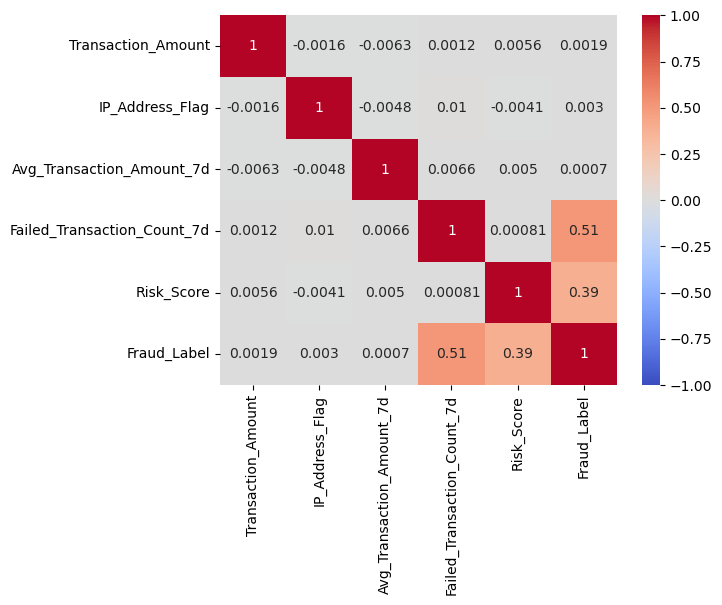

In [10]:
cols = ['Transaction_Amount','IP_Address_Flag','Avg_Transaction_Amount_7d','Failed_Transaction_Count_7d','Risk_Score','Fraud_Label']
figsize=(15, 4)
             
corr_v = df_fraud_dataset[cols].corr()
sns.heatmap(corr_v, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
set_title = ("Variation — Correlation matrix")

In [11]:
# features = df_fraud_dataset.select_dtypes(include=['number'])
features = df_fraud_dataset[['Transaction_Amount','Account_Balance','IP_Address_Flag','Previous_Fraudulent_Activity',
                             'Daily_Transaction_Count','Avg_Transaction_Amount_7d','Failed_Transaction_Count_7d', 'Card_Age','Transaction_Distance','Risk_Score','Is_Weekend']]
features

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend
0,39.79,93213.17,0,0,7,437.63,3,65,883.17,0.8494,0
1,1.19,75725.25,0,0,13,478.76,4,186,2203.36,0.0959,0
2,28.96,1588.96,0,0,14,50.01,4,226,1909.29,0.8400,0
3,254.32,76807.20,0,0,8,182.48,4,76,1311.86,0.7935,0
4,31.28,92354.66,0,1,14,328.69,4,140,966.98,0.3819,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,76960.11,0,0,2,389.00,3,98,1537.54,0.1493,1
49996,126.15,28791.75,0,0,13,434.95,4,93,2555.72,0.3653,0
49997,72.02,29916.41,0,1,1,369.15,2,114,4686.59,0.5195,0
49998,64.89,67895.67,0,0,13,242.29,4,72,4886.92,0.7063,0


In [12]:
target = df_fraud_dataset['Fraud_Label']
target, features

(0        0
 1        1
 2        1
 3        1
 4        1
         ..
 49995    0
 49996    1
 49997    0
 49998    1
 49999    1
 Name: Fraud_Label, Length: 50000, dtype: int64,
        Transaction_Amount  Account_Balance  IP_Address_Flag  \
 0                   39.79         93213.17                0   
 1                    1.19         75725.25                0   
 2                   28.96          1588.96                0   
 3                  254.32         76807.20                0   
 4                   31.28         92354.66                0   
 ...                   ...              ...              ...   
 49995               45.05         76960.11                0   
 49996              126.15         28791.75                0   
 49997               72.02         29916.41                0   
 49998               64.89         67895.67                0   
 49999               13.00          7668.82                0   
 
        Previous_Fraudulent_Activity  Daily_Trans

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)
X_train.head(5), y_train.head(5)

(       Transaction_Amount  Account_Balance  IP_Address_Flag  \
 20330               65.56         60711.91                0   
 17532              189.32         17937.59                1   
 45819              417.79         49936.16                0   
 34807              114.63         99898.60                0   
 31888              386.44         11584.67                0   
 
        Previous_Fraudulent_Activity  Daily_Transaction_Count  \
 20330                             0                        2   
 17532                             0                        1   
 45819                             0                        6   
 34807                             0                       10   
 31888                             0                       10   
 
        Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  Card_Age  \
 20330                     239.37                            2        62   
 17532                     368.23                            3        

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsClassifier()
# knn = KNeighborsRegressor()

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
print(f"The accuracy of the model is {knn.score(X_test, y_test): .2f}")

The accuracy of the model is  0.61


In [17]:
knn.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [18]:
y_test.values

array([1, 0, 0, ..., 1, 0, 0])